# Ряды и интегралы Фурье. Обзор основных свойств. Спектр сигнала. Возможность восстановления сигнала по спектру. Формула Пуассона. Длительность сигнала и ширина спектра. Принцип неопределенности. Теорема отсчетов.

### Основные свойства рядов и интегралов Фурье

Линейность: Преобразование Фурье линейно, то есть для любых сигналов f(t) и g(t) и их преобразований F(ω) и G(ω) выполняется:

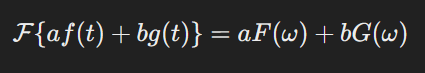

где a и b – произвольные коэффициенты.

Сдвиг во времени: Если сигнал f(t) сдвигается на t0​ во временной области, его спектр будет изменен по фазе:

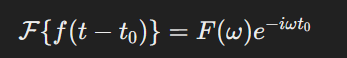

Масштабирование (сжатие и растяжение):
Изменение масштаба сигнала f(at) (где a≠0) приводит к растяжению или сжатию спектра:

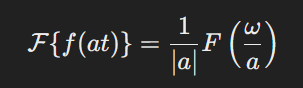

Дифференцирование во временной области:
Преобразование Фурье производной сигнала эквивалентно умножению его спектра на iω:

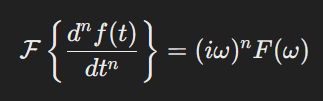

### Спектр сигнала

Спектр сигнала F(ω) — это преобразование Фурье сигнала f(t) во временной области. Он показывает, какие частоты присутствуют в сигнале и с какой амплитудой. Спектр является полезным для анализа сигналов, так как большинство естественных сигналов содержат полезную информацию в определенном диапазоне частот.

Амплитудный спектр показывает амплитуды каждой частоты.
Фазовый спектр отражает фазовые сдвиги.

### Возможность восстановления сигнала по спектру

По теореме Котельникова (Шеннона) для восстановимых сигналов с ограниченной полосой частот спектр позволяет однозначно восстановить исходный сигнал. Если сигнал дискретизирован с частотой, как минимум вдвое превышающей максимальную частоту в его спектре (fs≥2fmax), то его можно восстановить с использованием интерполяции синк-функцией (sinc interpolation):

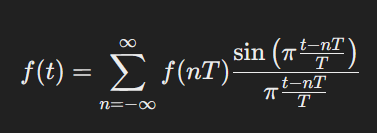

где T — период дискретизации.

### Формула Пуассона

Формула Пуассона используется для анализа спектра дискретного сигнала и помогает понять, как повторяются (или накладываются) спектральные копии исходного сигнала при дискретизации. Пусть у нас есть непрерывный сигнал f(t), чьё преобразование Фурье F(ω) известно. Если мы дискретизируем сигнал с частотой fs=1/T​, то спектр дискретного сигнала можно выразить как:

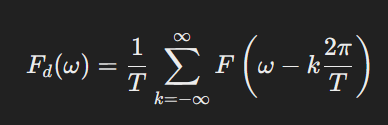

Эта формула показывает, что спектр дискретного сигнала представляет собой сумму копий спектра исходного сигнала, сдвинутых на кратные частоте дискретизации 2π/T. Если частота дискретизации недостаточно высока (меньше 2fmax), спектральные копии будут накладываться, что приведет к алиасингу и невозможности восстановления сигнала.

Принцип неопределенности гласит:

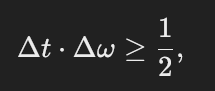

где Δt — длительность сигнала, Δω — ширина спектра. Это означает, что нельзя одновременно достичь высокой точности в измерении времени и частоты.

Теорема отсчетов

Теорема отсчетов (теорема Котельникова-Шеннона) утверждает, что сигнал, ограниченный по частоте (с максимальной частотой ωc), может быть полностью восстановлен из его дискретных отсчетов, если частота дискретизации fs больше чем удвоенная максимальная частота сигнала:

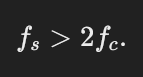

Временные отсчеты сигнала:

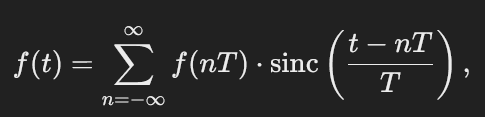

где T=1/fs​ — шаг дискретизации.

# Задача 1

Дан непрерывный сигнал f(t)=sin⁡(2π*f0t) с частотой f0=5 Гц. Этот сигнал был дискретизирован с частотой fs=20 Гц. Нам даны дискретные отсчеты этого сигнала, и требуется восстановить исходный непрерывный сигнал, используя интерполяцию sinc-функцией.
Решение

Для восстановления сигнала используем теорему Котельникова, согласно которой для восстановления сигнала с полосой частот, ограниченной частотой f0​, требуется частота дискретизации fs≥2f0. В данном случае fs=20 Гц.

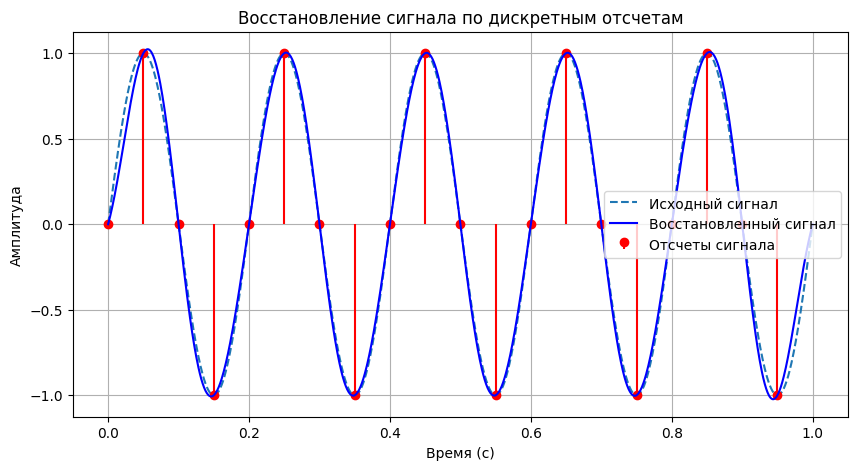

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f0 = 5             # частота сигнала, Гц
fs = 20            # частота дискретизации, Гц
T = 1 / fs         # период дискретизации
t_max = 1          # продолжительность сигнала, сек

# Временные точки для дискретного сигнала
n = np.arange(0, t_max, T)
# Дискретные отсчеты сигнала
samples = np.sin(2 * np.pi * f0 * n)

t_continuous = np.linspace(0, t_max, 1000)

# Функция восстановления сигнала с помощью sinc-интерполяции
def sinc_interp(x, s, t, T):
    return np.sum(s * np.sinc((t[:, None] - x) / T), axis=1)

restored_signal = sinc_interp(n, samples, t_continuous, T)
original_signal = np.sin(2 * np.pi * f0 * t_continuous)


plt.figure(figsize=(10, 5))
plt.plot(t_continuous, original_signal, label="Исходный сигнал", linestyle="--")
plt.stem(n, samples, linefmt="r", markerfmt="ro", basefmt=" ", label="Отсчеты сигнала")
plt.plot(t_continuous, restored_signal, label="Восстановленный сигнал", color="blue")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Восстановление сигнала по дискретным отсчетам")
plt.legend()
plt.grid()
plt.show()


# Задача 2

Дан непрерывный сигнал, представляющий собой сумму двух синусоид:
f(t)=sin⁡(2πf1t)+0.5⋅sin⁡(2πf2t)

где f1=3 Гц и f2​=15 Гц.

Выполним дискретизацию сигнала с частотой fs=20 Гц и попробуем его восстановить.
Повторим эксперимент с частотой дискретизации fs=10 Гц и сравним результат.
Исследуем влияние недостаточной частоты дискретизации на восстановленный сигнал.

###Цель задачи  
Показать, как низкая частота дискретизации может привести к потере информации о высокочастотных компонентах сигнала из-за эффекта алиасинга.

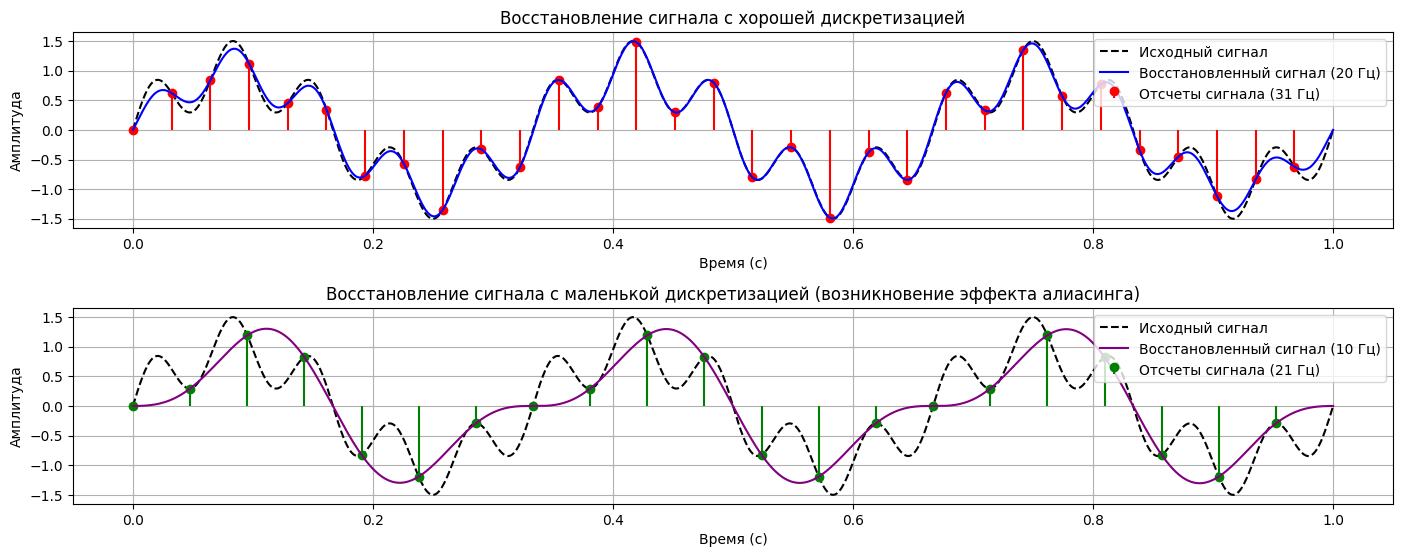

In [13]:
f1 = 3
f2 = 15
t_max = 1

# Временные точки исходного сигнала
t_continuous = np.linspace(0, t_max, 1000)
# Исходный сигнал
original_signal = np.sin(2 * np.pi * f1 * t_continuous) + 0.5 * np.sin(2 * np.pi * f2 * t_continuous)

fs_high = 31
T_high = 1 / fs_high
n_high = np.arange(0, t_max, T_high)
samples_high = np.sin(2 * np.pi * f1 * n_high) + 0.5 * np.sin(2 * np.pi * f2 * n_high)
restored_high = sinc_interp(n_high, samples_high, t_continuous, T_high)

fs_low = 21
T_low = 1 / fs_low
n_low = np.arange(0, t_max, T_low)
samples_low = np.sin(2 * np.pi * f1 * n_low) + 0.5 * np.sin(2 * np.pi * f2 * n_low)
restored_low = sinc_interp(n_low, samples_low, t_continuous, T_low)

plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(t_continuous, original_signal, "k--", label="Исходный сигнал")
plt.stem(n_high, samples_high, linefmt="r", markerfmt="ro", basefmt=" ", label="Отсчеты сигнала (31 Гц)")
plt.plot(t_continuous, restored_high, label="Восстановленный сигнал (20 Гц)", color="blue")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Восстановление сигнала с хорошей дискретизацией")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t_continuous, original_signal, "k--", label="Исходный сигнал")
plt.stem(n_low, samples_low, linefmt="g", markerfmt="go", basefmt=" ", label="Отсчеты сигнала (21 Гц)")
plt.plot(t_continuous, restored_low, label="Восстановленный сигнал (10 Гц)", color="purple")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Восстановление сигнала с маленькой дискретизацией (возникновение эффекта алиасинга)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### Алиасинг при совпадении частот

Когда частоты гармоник сигнала и частота дискретизации совпадают или имеют целое кратное соотношение, происходит переход спектральных копий, и частоты накладываются друг на друга, что создает эффект алиасинга.

# Сплайны. Ограничения на сигнал возникающие из возможности восстановить сигнал по усеченному изображению. Пространства сплайнов на ограниченном отрезке. Построение базиса из ограниченных функций.

Этот раздел изучает восстановление сигналов с помощью преобразований, основанных на сплайнах, и показывает, как выбор типа сплайнов и характеристик сигнала влияет на точность восстановления. Сплайны позволяют восстанавливать непрерывный сигнал по дискретным отсчетам, особенно если он задан на ограниченном интервале.  
### Преобразования сигналов, допускающие восстановление

Преобразования сигналов часто используют полиномы и кусочно-полиномиальные функции — сплайны — для аппроксимации и восстановления сигнала. Сплайны, особенно β-сплайны, имеют несколько свойств, которые делают их подходящими для восстановления:

Они локализованы, то есть их влияние ограничено вокруг каждого узла.
Они позволяют гибко контролировать гладкость переходов.
Их коэффициенты можно использовать для восстановления исходного сигнала на любом участке.

### **Восстановление сигнала по усеченному изображению**

Усеченное изображение сигнала — это представление, ограниченное по времени или по числу выборок, то есть восстановление по неполному набору данных. Это накладывает ряд ограничений:

1. Чтобы избежать потерь информации, сигнал должен быть ограничен по частотам (см. теорему Котельникова). Усечение сигнала приводит к ограничению его частотного спектра, что влияет на восстановление.

2. При усечении сигнала восстановление становится сложнее, так как края обрезанного участка вносят погрешности. Это может привести к эффектам, известным как исчезновение или выцветание амплитуд, из-за потерь высокочастотных деталей на концах.

### **Пространства сплайнов на ограниченном отрезке**

Для работы с ограниченным по времени сигналом удобно использовать пространства сплайнов на ограниченном отрезке. Пространство сплайнов — это множество функций, которые можно представить в виде суммы взвешенных сплайнов. Для восстановления сигнала, заданного в пределах ограниченного интервала, обычно используют кусочно-полиномиальные функции.

### **Построение базиса из ограниченных функций**

B-сплайны формируют базисное множество, в котором можно выразить сигнал как линейную комбинацию сплайнов. Каждый B-сплайн имеет компактный носитель, то есть он равен нулю за пределами своего поддерживающего интервала.

# Задача 3. Восстановление сигнала с помощью B-сплайнов с учетом ограничений на частоту и количество отсчетов
Предположим, что у нас есть сигнал, который представляет собой смесь двух синусоидальных волн с разными частотами. Сигнал задан на отрезке времени от t0=0 до t1=1 секунды. Мы будем пытаться восстановить сигнал с помощью B-сплайнов. Однако у нас есть несколько ограничений:

Частота дискретизации низкая: fs​=8 Гц (то есть всего 8 отсчетов на 1 секунду). Мы ограничены по количеству отсчетов — это только 8 точек.

Данный сигнал состоит из двух компонент:

Первая компонента: f1(t)=sin⁡(2π1t) (1 Гц)  
Вторая компонента: f2(t)=0.5*sin⁡(2π3t) (3 Гц)

### Решение
Мы будем использовать B-сплайны для интерполяции этих 8 отсчетов.
Проверим, как B-сплайны смогут аппроксимировать сигнал с учетом частоты дискретизации и ограничения на количество отсчетов.

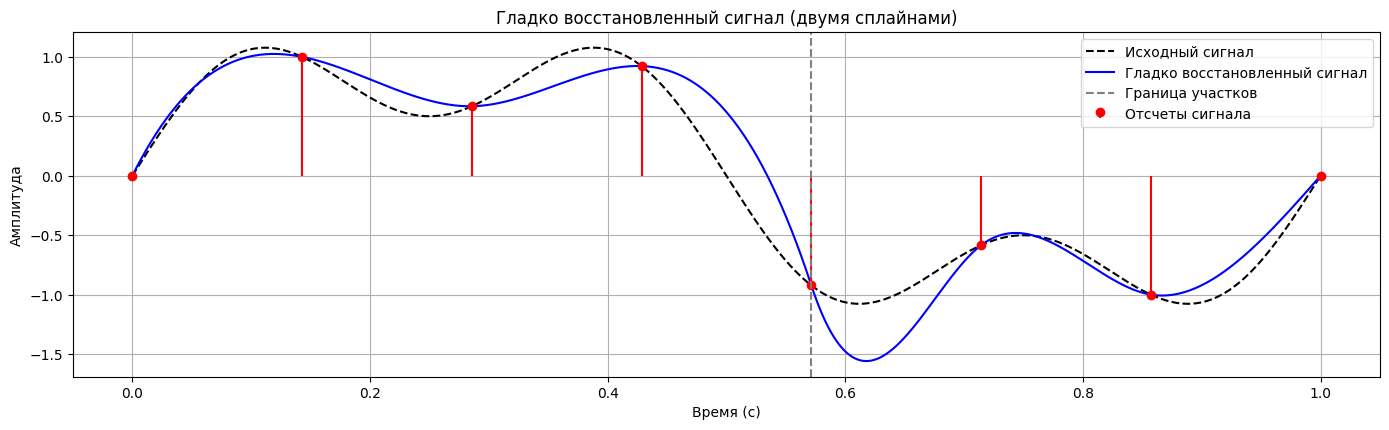

In [34]:
from scipy.interpolate import BarycentricInterpolator, CubicSpline

f1 = 1
f2 = 3
t_max = 1
t_continuous = np.linspace(0, t_max, 1000)

# Исходный сигнал
signal = np.sin(2 * np.pi * f1 * t_continuous) + 0.5 * np.sin(2 * np.pi * f2 * t_continuous)

fs = 8
n = np.linspace(0, t_max, fs)
samples = np.sin(2 * np.pi * f1 * n) + 0.5 * np.sin(2 * np.pi * f2 * n)

midpoint = len(n) // 2
left_t = n[:midpoint + 1]
right_t = n[midpoint:]
left_y = samples[:midpoint + 1]
right_y = samples[midpoint:]

left_spline = CubicSpline(left_t, left_y)

# Вычисление условий сопряжения в точке стыка
t_match = right_t[0]
y_match = left_spline(t_match)
y_prime_match = left_spline(t_match, 1)
y_double_prime_match = left_spline(t_match, 2)

right_spline = CubicSpline(
    right_t,
    right_y,
    bc_type=((1, y_prime_match), (2, 0))
)

left = left_spline(t_continuous[t_continuous <= t_match])
right = right_spline(t_continuous[t_continuous > t_match])

restored_signal = np.concatenate([left, right])

plt.figure(figsize=(14, 8))

# Восстановленный сигнал
plt.subplot(2, 1, 1)
plt.plot(t_continuous, signal, "k--", label="Исходный сигнал")
plt.plot(t_continuous, restored_signal, label="Гладко восстановленный сигнал", color="blue")
plt.stem(n, samples, linefmt="r", markerfmt="ro", basefmt=" ", label="Отсчеты сигнала")
plt.axvline(t_match, color="gray", linestyle="--", label="Граница участков")
plt.title("Гладко восстановленный сигнал (двумя сплайнами)")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


